# 1) Obtaining data and loading libraries

In [65]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('kc_house_data.csv')

#Inital look at df
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [67]:
#Initial observations
    #df has 21597 rows and 21 colums with various data types
    #columns waterfront, view and yr_renovated have missing values

# 2) Data cleaning

## Dealing with missing values

In [68]:
#columns waterfront, view and yr_renovated have missing values

#YR_RENOVATED
print(df.yr_renovated.unique())
print(df.yr_renovated.isna().sum())

# 17011 entries have the value of '0', which seems to be a placeholder for the fact the house has never been renovated
# there are 3842 NaNs - I will change these into 'not renovated', as that is the overwhelming value


df.yr_renovated = df.yr_renovated.astype('str')
df.loc[df.yr_renovated == '0.0','yr_renovated'] = 'not renovated'
df.loc[df.yr_renovated == 'nan','yr_renovated'] = 'not renovated'

#I will later make this columns categorical and bin the values


[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
3842


In [69]:
print(df.yr_renovated.isna().sum())

0


In [70]:
#VIEW
# this columns has 63 NaNs
# the overwhelming value in this column is 0 (19 422 out of 21 597)
# I will turn the missing values into '0'
# I will later make this columns categorical 

df.view.value_counts()
df.view = df.view.fillna(0.0)

In [71]:
#WATERFRONT
# overwhelming value: 0.0 (19075)
# NaNs = 2376
#For the sake of simplicty, I will drop this columns entirely as it will not provide much insight.
df = df.drop('waterfront',axis=1)

#While on it, I will also delete the date column, as we will not need that data
df = df.drop('date',axis=1)
#Now we have no obviuous missing values!
df.isna().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Looking for placeholders

In [72]:
#checking for placeholders in individual columns
#I will later use scatter plots to check for other unusual values and outliers

for var in list(df.columns):
    print (df[var].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
4345000510    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
1139600270    2
937000330     2
3293700496    2
4435000705    2
5430300171    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420,

Name: lat, Length: 5033, dtype: int64
-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
-122.363     99
-122.288     98
-122.357     96
-122.284     95
-122.172     94
-122.365     94
-122.306     93
-122.346     93
-122.351     92
-122.304     92
-122.348     92
-122.299     92
-122.375     92
-122.295     91
-122.350     90
-122.285     90
-122.292     90
-122.352     89
-122.289     89
-122.298     88
-122.359     88
-122.384     87
-122.317     86
-122.316     86
-122.301     86
           ... 
-122.454      1
-121.835      1
-122.519      1
-122.469      1
-121.788      1
-121.891      1
-121.325      1
-122.447      1
-121.760      1
-122.514      1
-121.725      1
-121.716      1
-121.803      1
-122.499      1
-121.792      1
-122.512      1
-121.815      1
-121.359      1
-121.733      1
-121.711      1
-121.767      1
-121.480      1
-121.701      1
-122.479      1
-122.467      1
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-1

In [73]:
#sqft_basement
# There are 454 '?' values in this dataset. That is a relatively small amount.
#I will first replace '?' with Nan
df.sqft_basement = df.sqft_basement.replace('?',np.nan)

#Now I will turn the columns into float and then replace the missing value with the median - which is 0!
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement = df.sqft_basement.fillna(df.sqft_basement.median())

## Checking columns types

In [74]:
#CHECKING COLUMN TYPES 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.1+ MB


In [75]:
# I will turn column zipcode into strings(objects) as they are categorical variables
df.zipcode = df.zipcode.astype('str')

#I will turn View into integer
df.view = df.view.astype('int64')

#All column types seem to be good now

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 3.1+ MB


## Removing outliers

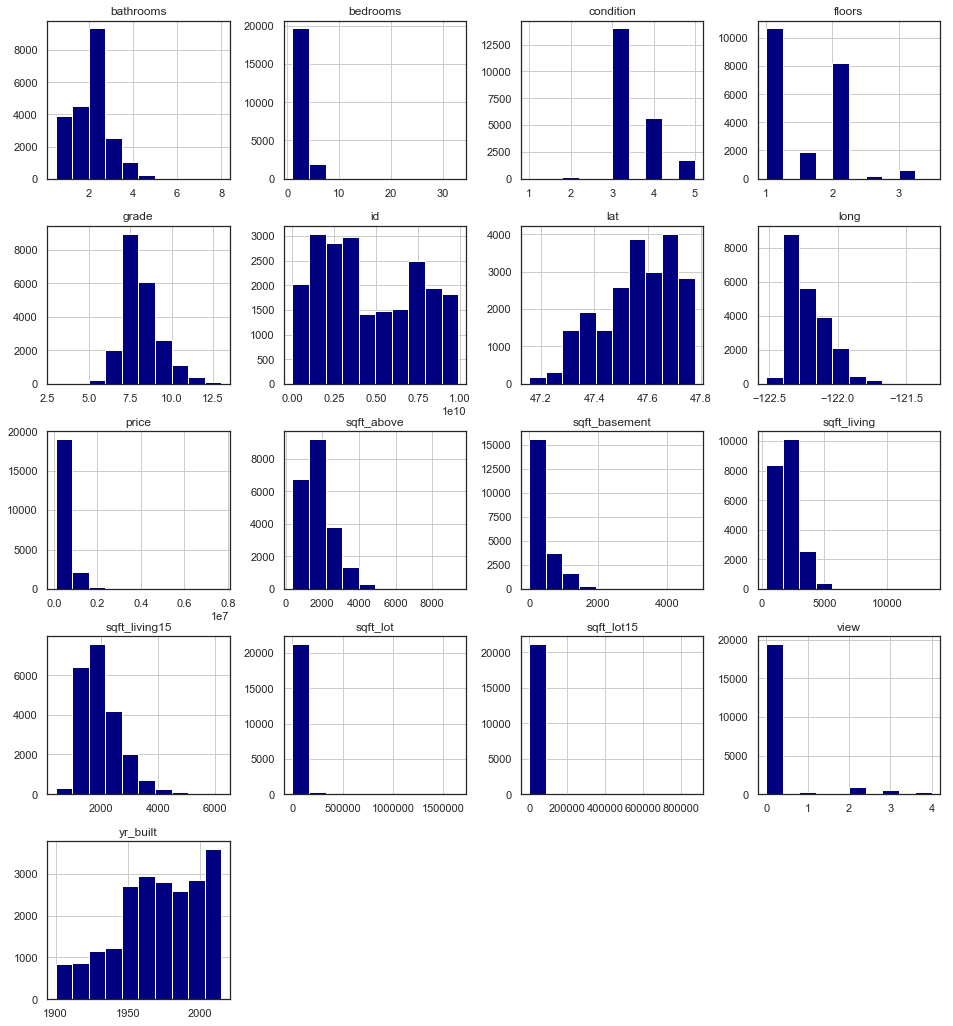

In [76]:
#QUICK VISUALISATIONS
df.hist(figsize=(16,18),color='navy');
# columns such ad bedrooms, price, sqft_lot and sqft_lot15 seem to have some outliers
# columns condition, floors, grade, bathrooms, view and bathrooms look like categorical variables


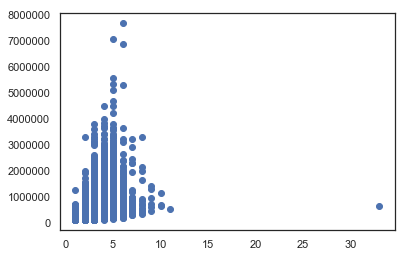

In [77]:
# after a quick look at different scatterplots, I have identified some outliers
plt.scatter(df.bedrooms,df.price)
plt.show()

In [78]:
#looking for outliers
df.describe()
#there is a house with 33 bedrooms
#let's have a look at it
df.loc[df.bedrooms > 15] 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1040,580.0,1947,not renovated,98103,47.6878,-122.331,1330,4700


In [79]:
#I will remove this house from the dataset
df = df.drop([15856])

In [80]:
#also, there are 3 houses sold for more than $6 000 000
#let's have a look at them
df.loc[df.price > 6000000]
#as we can see, there are only two houses in that category, which are skewing our dataset
#median price: $450 000
#mean price: $540 296

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,2,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,3,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,4,3,13,8860,1030.0,2001,not renovated,98039,47.6305,-122.240,4540,42730


In [81]:
#I will drop these houses from the dataset
df = df.drop([3910])
df = df.drop([7245])
df = df.drop([9245])

In [82]:
#Outliers in sqft_living
df.loc[df.sqft_living > 10000]
#There are only 3 properties with sgft_living value above 10000
#The value of the property is $2,280,000
#I will remove this property from the dataset
df = df.drop([12764])

## Multicollinearity

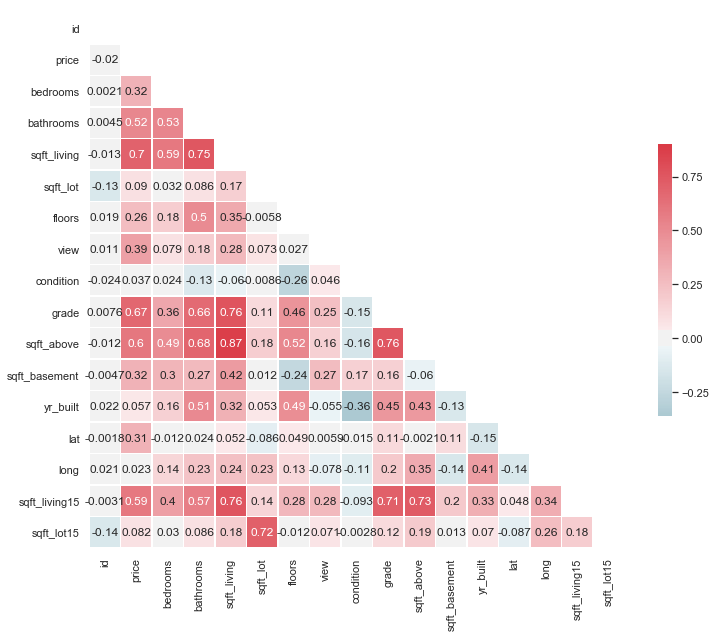

In [83]:
# checking for MULTICOLLINEARITY


sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5});

In [30]:
# columns 'sqft_living' and 'sqft_above' have correlation of 0.87
# looking at the 5 point statistics, their values seems to be roughly similar, they indeed look they describe the same
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.159200e+04,2.159200e+04,21592.000000,21592.000000,21592.000000,2.159200e+04,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000
mean,4.580173e+09,5.392838e+05,3.371341,2.114927,2078.620369,1.508391e+04,1.493956,0.232632,3.409781,7.657095,1787.364116,285.246434,1971.002362,47.560071,-122.213981,1986.219387,12747.368007
std,2.876509e+09,3.586623e+05,0.903438,0.765850,909.206382,4.136896e+04,0.539572,0.763573,0.650501,1.171606,822.540977,438.292204,29.373163,0.138560,0.140727,684.540761,27240.912818
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471075,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.067975e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,47.678000,-122.125000,2360.000000,10080.000000
max,9.900000e+09,5.570000e+06,11.000000,7.500000,9640.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [84]:
# I will therefore drop the 'sqft_above' column
df = df.drop('sqft_above',axis=1)

## Transforming numerical variables

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


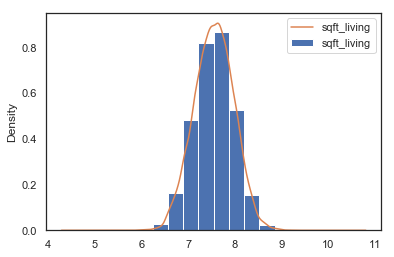

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


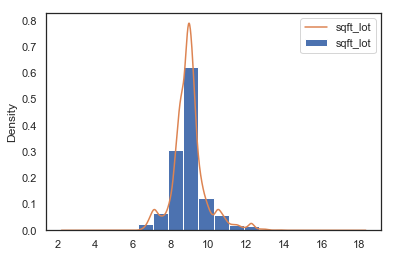

ValueError: autodetected range of [-inf, 8.480529207044645] is not finite

In [47]:
#LOG TRANSFORMATION
#let's have a look at distribution of our numeric data to see which columns need log transormation

for column in ['sqft_living', 'sqft_lot','sqft_basement','sqft_living15','sqft_lot15']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()
    
# all columns might need log transformation to improve distribution and skewness:
  

In [85]:
#Log transforming data
df.sqft_living = np.log(df.sqft_living)
df.sqft_lot = np.log(df.sqft_lot)
df.sqft_basement = np.log(df.sqft_basement)
df.sqft_living15 = np.log(df.sqft_living15)
df.sqft_lot15 = np.log(df.sqft_lot15)

#sqft_basement has zero values - what should I do with it?

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [48]:
df.sqft_living.describe()

count    21592.000000
mean         7.550398
std          0.423542
min          5.913503
25%          7.265430
50%          7.554859
75%          7.843849
max          9.173676
Name: sqft_living, dtype: float64

In [50]:
df.sqft_living.describe()

count    2.159200e+04
mean     2.007302e-13
std      1.000000e+00
min     -3.864774e+00
25%     -6.728215e-01
50%      1.053129e-02
75%      6.928483e-01
max      3.832624e+00
Name: sqft_living, dtype: float64

In [86]:
#Standardisation/Normalisation
#all numerical columns: sqft_living,sqft_lot,sqft_basement, sqft_living15, sqft_lot15
df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()
df.sqft_basement = (df.sqft_basement - df.sqft_basement.mean()) / df.sqft_basement.std()
df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()
df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()

## Preparing categorical variables

In [87]:
#DEALING WITH CATEGORICAL VARIABLES
# bedrooms
# bathrooms
# floors
# view
# condition
# grade

# year renovated - bin and cat
# year built - bin and cat
# sqft_basement - bin and cat?

for var in ['bedrooms','bathrooms','floors','view','condition','grade']:
    print (df[var].value_counts())

3     9824
4     6882
2     2760
5     1600
6      270
1      196
7       37
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50      99
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
6.75       2
6.50       2
7.50       1
Name: bathrooms, dtype: int64
1.0    10672
2.0     8233
1.5     1910
3.0      610
2.5      160
3.5        7
Name: floors, dtype: int64
0    19484
2      956
3      507
1      330
4      315
Name: view, dtype: int64
3    14017
4     5676
5     1700
2      170
1       29
Name: condition, dtype: int64
7     8973
8     6065
9     2615
6     2038
10    1134
11     398
5      242
12      88
4       27
13      11
3        1
Name: grade, dtype: int64


In [88]:
#columns condition, view, floors are distributed within less than 7 numbers - I will simply turn them into categories now
df.condition = df.condition.astype('category')
df.view = df.view.astype('category')
df.floors = df.floors.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 18 columns):
id               21592 non-null int64
price            21592 non-null float64
bedrooms         21592 non-null int64
bathrooms        21592 non-null float64
sqft_living      21592 non-null float64
sqft_lot         21592 non-null float64
floors           21592 non-null category
view             21592 non-null category
condition        21592 non-null category
grade            21592 non-null int64
sqft_basement    0 non-null float64
yr_built         21592 non-null int64
yr_renovated     21592 non-null object
zipcode          21592 non-null object
lat              21592 non-null float64
long             21592 non-null float64
sqft_living15    21592 non-null float64
sqft_lot15       21592 non-null float64
dtypes: category(3), float64(9), int64(4), object(2)
memory usage: 2.7+ MB


In [89]:
# columns bedrooms,bathrooms and grade will be binned first

# first, let's create bins for based on the values observed (6 values will result in 5 bins)

df.bedrooms = df.bedrooms.astype('float64')
df.grade = df.grade.astype('float64')

bedrooms_bins = [0,2,3,4,5,11]
bathrooms_bins = [0,1,2,3,4,5,8]
grade_bins = [0,6,7,8,9,10,11,14]



# using pd.cut
bins_bedrooms = pd.cut(df['bedrooms'], bedrooms_bins)
bins_bathrooms = pd.cut(df['bathrooms'], bathrooms_bins)
bins_grade = pd.cut(df['grade'], grade_bins)

# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_bedrooms = bins_bedrooms.cat.as_unordered()
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bins_grade = bins_grade.cat.as_unordered()


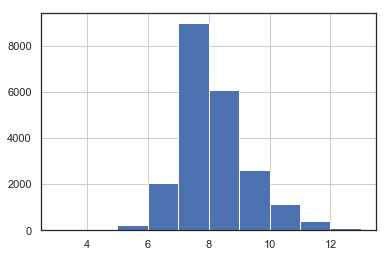

In [37]:
df.grade.hist()

In [90]:
# replace the existing columns
df['bedrooms']=bins_bedrooms
df['bathrooms']=bins_bathrooms
df['grade']=bins_grade

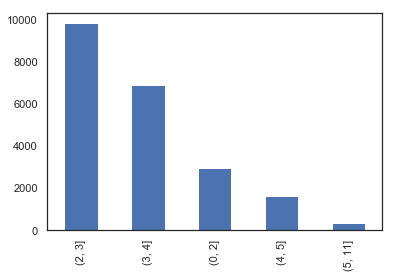

In [91]:
df.bedrooms.head()
df.bedrooms.value_counts().plot(kind='bar')

In [92]:
#LABEL ENCODING

df['bedrooms'] = df['bedrooms'].cat.codes
df['bathrooms'] = df['bathrooms'].cat.codes
df['grade'] = df['grade'].cat.codes

In [93]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.159200e+04,2.159200e+04,21592.000000,21592.000000,2.159200e+04,2.159200e+04,21592.000000,0.0,21592.000000,21592.000000,21592.000000,2.159200e+04,2.159200e+04
mean,4.580173e+09,5.392838e+05,1.375880,1.439237,2.007302e-13,-2.650023e-14,1.670433,NaN,1971.002362,47.560071,-122.213981,3.829671e-13,-5.526428e-14
std,2.876509e+09,3.586623e+05,0.865065,0.918228,1.000000e+00,1.000000e+00,1.142377,NaN,29.373163,0.138560,0.140727,1.000000e+00,1.000000e+00
min,1.000102e+06,7.800000e+04,0.000000,0.000000,-3.864774e+00,-3.033888e+00,0.000000,NaN,1900.000000,47.155900,-122.519000,-4.736909e+00,-3.055644e+00
25%,2.123049e+09,3.220000e+05,1.000000,1.000000,-6.728215e-01,-5.149173e-01,1.000000,NaN,1951.000000,47.471075,-122.328000,-7.113495e-01,-5.213750e-01
50%,3.904930e+09,4.500000e+05,1.000000,2.000000,1.053129e-02,-5.691502e-02,1.000000,NaN,1975.000000,47.571800,-122.231000,-6.671546e-02,-2.703123e-02
75%,7.308900e+09,6.450000e+05,2.000000,2.000000,6.928483e-01,3.178995e-01,2.000000,NaN,1997.000000,47.678000,-122.125000,6.937343e-01,3.174112e-01
max,9.900000e+09,5.570000e+06,4.000000,5.000000,3.832624e+00,5.908512e+00,6.000000,NaN,2015.000000,47.777600,-121.315000,3.649726e+00,5.807423e+00


## Creating dummy variables for categorical columns

In [94]:
bathrooms_dummy = pd.get_dummies(df['bathrooms'], prefix="bath")
bedrooms_dummy = pd.get_dummies(df['bedrooms'], prefix="bed")
grade_dummy = pd.get_dummies(df['grade'], prefix="grade")

In [96]:
add_series = [df,bathrooms_dummy, bedrooms_dummy, grade_dummy]
df_with_dummies = pd.concat(add_series, axis=1)

In [99]:
df_with_dummies.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_basement,yr_built,lat,...,bed_2,bed_3,bed_4,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6
count,2.159200e+04,2.159200e+04,21592.000000,21592.000000,2.159200e+04,2.159200e+04,21592.000000,0.0,21592.000000,21592.000000,...,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000,21592.000000
mean,4.580173e+09,5.392838e+05,1.375880,1.439237,2.007302e-13,-2.650023e-14,1.670433,NaN,1971.002362,47.560071,...,0.318729,0.074102,0.015283,0.106891,0.415571,0.280891,0.121110,0.052519,0.018433,0.004585
std,2.876509e+09,3.586623e+05,0.865065,0.918228,1.000000e+00,1.000000e+00,1.142377,NaN,29.373163,0.138560,...,0.465995,0.261942,0.122681,0.308982,0.492832,0.449445,0.326262,0.223077,0.134513,0.067559
min,1.000102e+06,7.800000e+04,0.000000,0.000000,-3.864774e+00,-3.033888e+00,0.000000,NaN,1900.000000,47.155900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,1.000000,1.000000,-6.728215e-01,-5.149173e-01,1.000000,NaN,1951.000000,47.471075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,1.000000,2.000000,1.053129e-02,-5.691502e-02,1.000000,NaN,1975.000000,47.571800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,2.000000,2.000000,6.928483e-01,3.178995e-01,2.000000,NaN,1997.000000,47.678000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,5.570000e+06,4.000000,5.000000,3.832624e+00,5.908512e+00,6.000000,NaN,2015.000000,47.777600,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#CHECKING FOR LINEARITY
for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'grade', 'sqft_basement', 'yr_built','yr_renovated', 'lat', 'long', 'sqft_living15','sqft_lot15']:
    plt.scatter(df[column],df.price,alpha=0.2)
    plt.xlabel(column)
    plt.legend()
    plt.show()